# Regressão Linear

## Sumário da Aula

<ul>
    <li>Modelos Lineares</li>
    <ul>
        <li>Regressão Linear Simples ⛬</li>
        <li>Correlação ($\rho$)</li>
        <li>Determinação ($R^2$)</li>
        <li>Premissas para Análise Inferencial</li>
    </ul>
    <li>Estimando Modelos Lineares</li>
    <ul>
        <li>Regressão Linear Simples ⛬</li>
        <li>Extra! 📃 Regressão Linear Múltipla</li>
    </ul>
</ul>

### Biblioteca Principal 📚: statsmodels

<img src="https://www.statsmodels.org/dev/_images/statsmodels-logo-v2-no-text.svg" width="100" style="float: right;">

In [1]:
!pip install --upgrade statsmodels --quiet

In [2]:
import statsmodels.api as sm

In [3]:
import statsmodels.formula.api as smf

#### Funções Auxiliares

In [4]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def build_path(subfolder = 'merge'):
    folderpath = os.path.join(os.getcwd(), os.pardir, 
                              'project', 'data', subfolder)
    folderpath = os.path.abspath(folderpath)
    if not os.path.exists(folderpath): 
        os.makedirs(folderpath)
    return folderpath

def load_data():
    data = {}   
    folderpath = build_path()
    for filename in os.listdir(folderpath):
        if filename.endswith('state_infections_characteristics.json'):
            filepath = os.path.join(build_path(), filename)
            data[filename.split('.')[0]] = pd.read_json(filepath)
    return data

## Modelos Lineares

<ul>
    <li>Existem vários tipos de modelos de regressão linear em modelos estatísticos,</li>
    <ul>
        <li>desde os mais básicos (por exemplo, mínimos quadrados ordinários); </li>
        <li>até mais complexos (por exemplo, mínimos quadrados reponderados iterativamente). </li>
    </ul>
    <li>statsmodels é uma biblioteca Python para adequação de vários tipos de modelos estatísticos:</li>
    <ul>
        <li>realiza testes estatísticos;</li>
        <li>explora dados; e</li>
        <li>visualiza dados.</li>
    </ul>
    <li>O statsmodels contém métodos estatísticos frequentistas mais "clássicos";</li>
</ul>
🚨 Métodos bayesianos e de aprendizado de máquina são encontrados em outras bibliotecas.

👉 Referência: <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>

Na pesquisa anual de usuários do Kaggle com foco no trabalho de cientistas de dados...

...o algoritmo mais usado por eles é a regressão linear (e logística)

<img src='figs/most_popular_algorithms.png' width='800' style="margin-left: auto; margin-right: auto;">


👉 Referência: <a href='https://www.kaggle.com/kaggle-survey-2021'>State of Data Science and Machine Learning 2021</a>

<pre>Vamos utilizar: dados de Taxa de Letalidade por Covid-19 e dados Sociodemográficos por Unidade da Federação. O objetivo é aprender a usar a regressão linear</pre>

In [5]:
data = load_data()
df = \
    data['state_infections_characteristics'].set_index('id')
df.head()

,nome,regiao,Densidade demográfica,IDH,Rendimento mensal domiciliar per capita,Veículos per capita,TaxaLetalidade
id,,,,,,,
12,Acre,Norte,5.06,0.710,1038,0.402851,0.012576
27,Alagoas,Nordeste,112.38,0.684,935,0.330674,0.021420
13,Amazonas,Norte,2.53,0.700,965,0.271440,0.022690
16,Amapá,Norte,5.15,0.688,1177,0.317230,0.011640
29,Bahia,Nordeste,25.03,0.691,1010,0.345750,0.017558


<img src='https://imgs.xkcd.com/comics/data_trap.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/2582/'>2582: Data Trap</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/2582:_Data_Trap'>Explicação</a>.

### Regressão Linear Simples

<code>A nossa pretensão é descobrir se o IDH de um Estado tem efeito sobre a Taxa da Letalidade da Covid</code>

<img src='https://imgs.xkcd.com/comics/proxy_variable.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/2652/'>2652: Proxy Variable</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/2652:_Proxy_Variable'>Explicação</a>.

Matematicamente, expressaríamos da seguinte forma:

$$TaxaLetalidade = f(IDH)$$

Uma das formas de se expressar tal função é a partir de uma relação linear, tal como:

$$ TaxaLetalidade = \alpha + \beta \times IDH + \epsilon$$

👉 Se dá o nome de...
<ul>
    <li>regressão ao processo de encontrar a relação entre duas variáveis;</li>
    <li>Linear porque a regressão ocorre por uma reta (equação linear); e</li>
    <li>Simples porque estamos trabalhando com apenas uma variável explicativa.</li>
</ul>

🚨 É raro que as variáveis do mundo real, ainda mais quando ligadas a fenômenos sociais, consigam ser representadas por uma reta.

<img src='https://imgs.xkcd.com/comics/linear_regression.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/1725/'>1725: Linear Regression</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/1725:_Linear_Regression'>Explicação</a>.

#### Abordagem Visual

<pre>Queremos melhor analisar as relações entre as variáveis do nosso conjunto de dados.</pre>

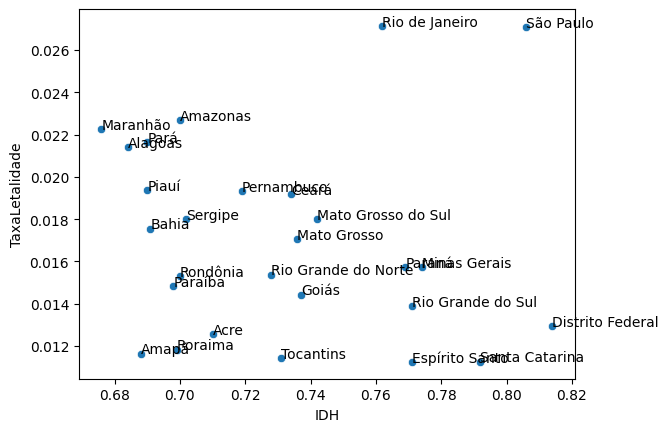

In [6]:
import seaborn as sns
ax = sns.scatterplot(df, y='TaxaLetalidade', x='IDH')
for state, idh, taxaletalidade in zip(df.nome, df['IDH'], 
                                      df['TaxaLetalidade']):
    ax.annotate(state, xy=(idh, taxaletalidade))

<pre>Volte no slide anterior e encontre a linha da regressão que passa o mais perto possível dos Estados: </pre>

$$TaxaLetalidade = \alpha + \beta \times IDH + \epsilon$$

<pre>Para tanto, utilize os mínimos quadrados ordinários (MQO), isto é:</pre>

$$argmin_{\alpha, \beta} = \sum_{i=1}^{27} TaxaLetalidade_{UF_{i}} - (\alpha + \beta \times IDH_{UF_{i}})$$

👉 Tente simular seu palpite com esta <a href='https://setosa.io/ev/ordinary-least-squares-regression/'>Visualização Dinâmica</a>. 

👉 Dica: não esqueça de simular o que ocorre com e sem a presença de SP e RJ.

<pre>Veja como fica a regressão linear simples com todos os Estados:</pre>

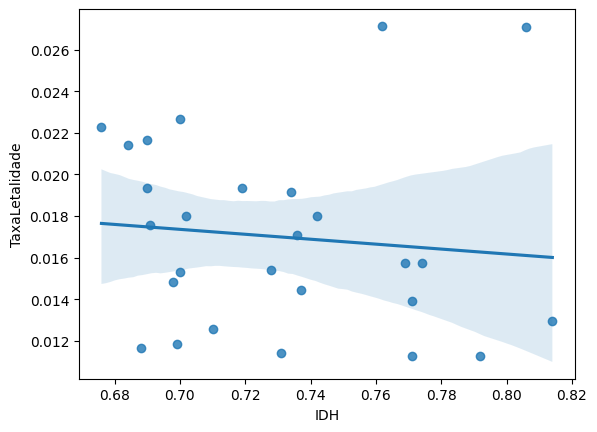

In [7]:
ax = sns.regplot(df, y='TaxaLetalidade', x='IDH')
for state, letalidade, taxa in zip(df.nome, df['IDH'], 
                                   df['TaxaLetalidade']):
    ax.annotate(state, xy=(idh, letalidade))

<pre>🚨 Regressão Linear não funciona bem com Outliers. Temos algum(ns)?</pre>

👉 Outliers com mais de uma variável podem ser detectados com clusterização.

In [8]:
!pip install --upgrade scikit-learn --quiet

In [9]:
# Trabalhando as variáveis para a mesma escala
cluster_df = df[['nome', 'TaxaLetalidade', 'IDH']].copy()
cluster_df['TaxaLetalidade'] = MinMaxScaler().\
    fit_transform(cluster_df[['TaxaLetalidade']])
cluster_df['IDH'] = MinMaxScaler().\
    fit_transform(cluster_df[['IDH']])

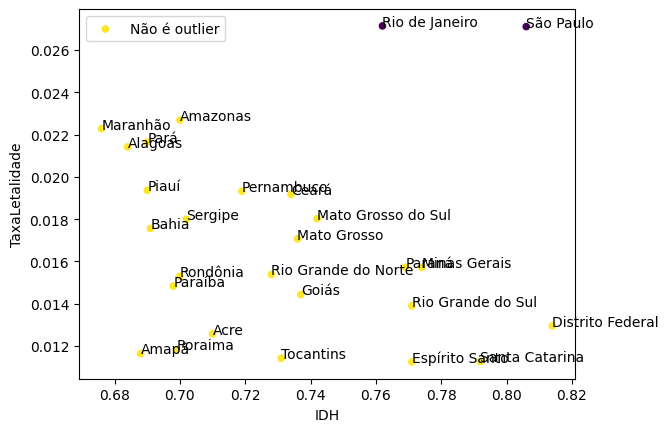

In [10]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN().fit(cluster_df[['IDH', 'TaxaLetalidade']])
ax = sns.scatterplot(data=df, x='IDH', y='TaxaLetalidade', 
                     c=cluster.labels_)
ax.legend(['Não é outlier'])
for state, idh, letalidade in zip(df.nome, df['IDH'], 
                                  df['TaxaLetalidade']):
    ax.annotate(state, xy=(idh, letalidade))

<pre>🚨 Nem sempre os outliers precisam ser excluídos. Resultados não significativos também podem ser resultados relevantes. Principalmente diante de um n baixo. </pre>

Outras saídas para esse caso:
* trabalhar com municípios e não estados ($n \gg 30$);
* trabalhar com outros modelos que não os modelos lineares.

<img src='https://datasciencedojo.com/wp-content/uploads/meme-6.jpg' width=400 style="margin-left: auto; margin-right: auto;">

<pre>Veja como fica a regressão linear simples sem SP e RJ (valores discrepantes):</pre>

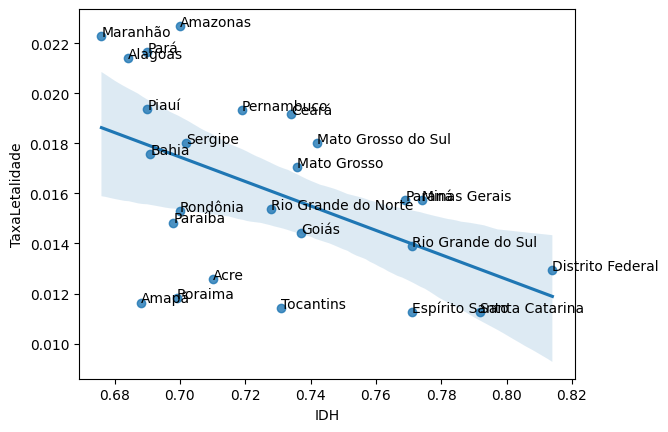

In [11]:
df_sem_outliers = df[(df.nome != 'São Paulo')\
                    & (df.nome != 'Rio de Janeiro')]
ax = sns.regplot(df_sem_outliers, y='TaxaLetalidade', x='IDH')
for state, idh, letalidade in zip(df_sem_outliers.nome,
                                  df_sem_outliers['IDH'], 
                                  df_sem_outliers['TaxaLetalidade']):
    ax.annotate(state, xy=(idh, letalidade))

#### Interpretação

❌ Interpretação Incorreta

Maior Desenvolvimento Humano Parece Causar Menor Taxa de Letalidade por Covid-19

✅ Interpretação Correta

Maior Desenvolvimento Humano Parece Associado com Menor Taxa de Letalidade por Covid-19

🚨 Vulnerabilidade a Outliers

Uma vez que o MQO utiliza a segunda potência, SP e RJ distorcem a regressão linear

🔔 Neste ponto, temos um indício de que não possuimos uma amostra boa o suficiente para realizar uma regressão, uma vez que a exclusão de 2 observações equivale a $7,5\%$ da sua amostra.

🔔 Mais à frente, vamos ter outro indício mais crítico: uma das premissas da validade da regressão linear estará comprometida. Aguente firme que chegaremos lá.

ℹ️ Spoiler 01

<pre>Quanto exatamente seria a associação entre IDH e Taxa de Letalidade?</pre>

Frequentemente, usamos coeficiente de correlação de Pearson, que veremos no próximo slide.

👉 Há outros coeficientes de correlação como coeficiente de Spearman, Kendall, entre outros, que não vemos nesta aula, mas recomendamos sua pesquisa.

📚 William H. Kruskal (1958) Ordinal Measures of Association, Journal of the American Statistical Association, 53:284, 814-861, DOI: <a href='https://www.tandfonline.com/doi/abs/10.1080/01621459.1958.10501481'>10.1080/01621459.1958.10501481</a>

ℹ️ Spoiler 02

<pre>Quanto da variação na Taxa de Letalidade parece ser explicada pela variação do IDH?</pre>

Frequentemente, utilizamos o $R^2$, que veremos após correlação.

👉 Há outras métricas como MAE, MSE, RMSE e $R^2$ ajustado, que não vemos nesta aula, mas recomendamos a sua pesquisa.

📚 Chicco D, Warrens MJ, Jurman G. The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation. PeerJ Comput Sci. 2021 Jul 5;7:e623. doi: <a href='https://doi.org/10.7717%2Fpeerj-cs.623'>10.7717/peerj-cs.623.</a>

### Correlação

O coeficiente de correlação de Pearson, $\rho$, mede o grau da correlação linear entre duas variáveis de escala métrica.

$$\rho = \frac{CoV(IDH,TaxaLetalidade)}{\sigma_{IDH}\times\sigma_{TaxaLetalidade}} = \frac{\sum_{i=1}^{27}\left((IDH_i - \overline{IDH})\times(TaxaLetalidade_i - \overline{TaxaLetalidade})\right)}{\sqrt{\sum_{i=1}^{27} (IDH_i - \overline{IDH})^2} \times \sqrt{\sum_{i=1}^{27} (TaxaLetalidade_i - \overline{TaxaLetalidade})^2}},$$

$$\overline{IDH} = \frac{1}{27}\times\sum_{i=1}^{27}IDH_{i}$$
$$\overline{TaxaLetalidade} = \frac{1}{27}\times\sum_{i=1}^{27}TaxaLetalidade_{i}$$

In [12]:
desvio_da_media = lambda x: x - x.mean()
co_variancia = lambda x, y: (desvio_da_media(x) * desvio_da_media(y)).\
                                sum()
desvio_padrao = lambda x: co_variancia(x, x)**0.5

IDH = df_sem_outliers['IDH']
TaxaLetalidade = df_sem_outliers['TaxaLetalidade']

numerador = co_variancia(IDH, TaxaLetalidade)
denominador = desvio_padrao(IDH) * desvio_padrao(TaxaLetalidade)

f'ρ = {numerador/denominador}'

'ρ = -0.5036489026973191'

#### Interpretação

* $0.9 < |\rho| \leq 1$ indica uma correlação linear muito forte;
* $0.7 < |\rho| \leq 0.9$ indica uma correlação linear forte;
* $0.5 < |\rho| \leq 0.7$ ndica uma correlação linear moderada;
* $0.3 < |\rho| \leq 0.5$ indica uma correlação linear fraca;
* $0 < |\rho| \leq 0.3$ indica uma correlação linear desprezível.

🚨 $\rho$ negativo significa que uma variável aumenta enquanto a outra diminui

🚨 Correlação não implica causalidade, bem como podemos ter correlação espúria: consumo de sorvete $\times$ número de afogamentos (estação do ano seria o fator de confusão?)

<img src='https://imgs.xkcd.com/comics/correlation.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/552/'>552: Correlation</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/552:_Correlation'>Explicação</a>.

#### Abordagem Visual

<pre>Veja como ficam todas as possíveis correlações sem SP e RJ (valores discrepantes):</pre>

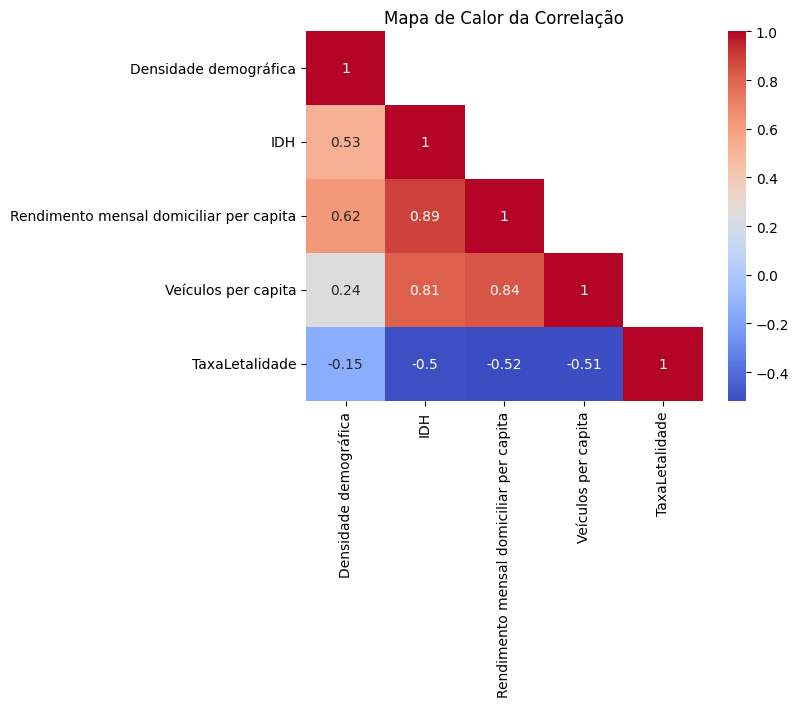

In [13]:
import numpy as np
correlation = df_sem_outliers.drop(columns=['nome', 'regiao']).corr()
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', 
                      mask=np.triu(np.ones_like(correlation), k=1))
heatmap.set_title('Mapa de Calor da Correlação');

### Determinação

O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. 

$$R^2 = 1 - \frac{SSE}{SST},$$ onde:

$$ SSE = \sum_{i=1}^{27}(\epsilon_{i})^2, \epsilon = TaxaLetalidade_{i} - \alpha_{i} + \beta_{i} \times IDH_{i}$$
$$ SST = \sum_{i=1}^{27}(TaxaLetalidade_{i} - \overline{TaxaLetalidade})^2$$
$$\overline{TaxaLetalidade} = \frac{1}{27}\times\sum_{i=1}^{27}TaxaLetalidade_{i}$$

$$R^2 = 1 - \frac{SSE}{SST},$$ onde:

- SSE (Soma dos Quadrados dos Erros) representa a soma dos quadrados das diferenças entre os valores reais da variável dependente e os valores previstos pelo modelo de regressão. É uma medida da variabilidade não explicada pelo modelo.
- SST (Soma Total dos Quadrados) representa a soma dos quadrados das diferenças entre os valores reais da variável dependente e a média dos valores reais. Representa a variabilidade total dos dados.

In [14]:
#não se preocupe com esse código, veremos depois como desenvolvê-lo
tl_model = smf.ols('TaxaLetalidade ~ IDH + 1', data=df_sem_outliers).fit()
TaxaLetalidadePrevista = tl_model.predict(IDH)

In [15]:
#vamos calcular o valor de R² com a fórmula matemática
sse = ((TaxaLetalidade - TaxaLetalidadePrevista)**2).sum()
sst = ((TaxaLetalidade - TaxaLetalidade.mean())**2).sum()
r2 = 1 - sse/sst

f'{r2:.5%} da variância da Taxa de Letalidade \
é explicada pela variância no IDH'

'25.36622% da variância da Taxa de Letalidade é explicada pela variância no IDH'

#### Interpretação

No nosso caso, é o percentual da variação da Taxa de Letalidade que é explicável pela variação do IDH.

É definido pelo intervalo de 0 a 1, onde 0 não explica nada e 1 informa que há um relacionamento perfeito.

👉 Veja em mais detalhes <a href='https://statisticsbyjim.com/regression/interpret-r-squared-regression/'>como interpretar o R²</a>.

#### Abordagem Visual

<pre>Veja como ficam os R² com diferentes ordens de magnitude (14,7% vs. 86,5%):</pre>

<table>
<tr><td><img src='https://blog.minitab.com/hubfs/Imported_Blog_Media/flp_highvar.png'></td><td><img src='https://blog.minitab.com/hubfs/Imported_Blog_Media/flp_lowvar.png'</td></tr>
</table>

### Premissas para Análise Inferencial

🚨 Amostragem vs. População

Caso seja utilizada a amostragem, ela deve ser aleatória e com amostras independentes
* Amostragem com Reposição ou $n < 10\%$ do universo populacional

🚨 Distribuição e Dispersão dos Resíduos

Os resíduos ($\epsilon$ da Regressão Linear) devem ser distribuídos conforme curva normal, bem como devem ser homocedásticos (veremos no próximo slide).

ℹ️ Os resíduos estão distribuídos conforme uma curva normal?

<pre>✅ A princípio, estamos com uma dispersão de resíduos próxima da distribuição normal.</pre>

In [16]:
residuos = pd.DataFrame(TaxaLetalidadePrevista - TaxaLetalidade, 
                        columns=['Residuos'])

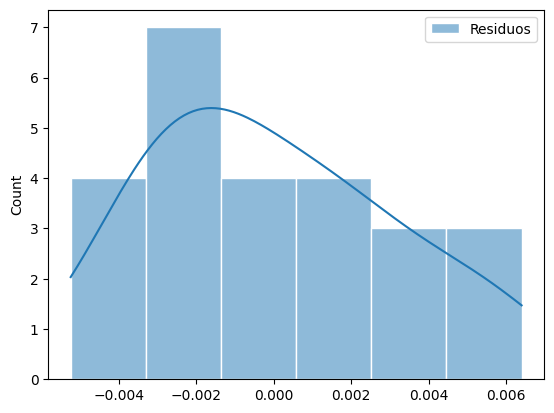

In [17]:
sns.histplot(residuos, kde=True, edgecolor='w');

ℹ️ Os resíduos são homocedásticos?

👉 Homocedasticidade: a dispersão dos erros deve ser constante ao longo de todas as faixas de valores das variáveis independentes.

<pre>❌ Perceba que a dispersão aumenta. Isto compromete a validade externa da regressão linear.</pre>

In [18]:
LetalidadePrevista = pd.DataFrame(TaxaLetalidadePrevista,
                                  columns=['TaxaLetalidadePrevista'])

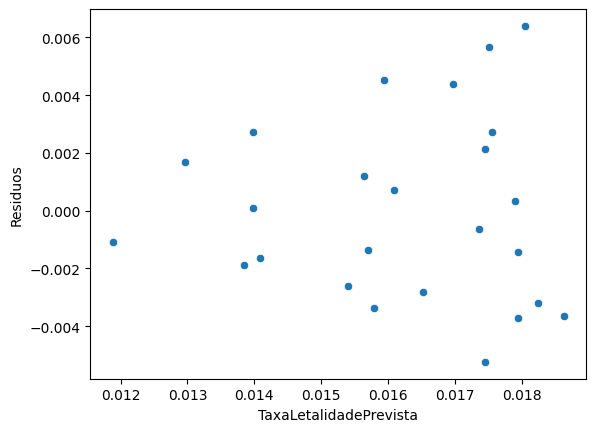

In [19]:
sns.scatterplot(x=LetalidadePrevista.iloc[:,0], y=residuos.iloc[:,0]);

## Estimando Modelos Lineares

Os modelos lineares no statsmodels têm duas interfaces principais diferentes:
<ul>
    <li>baseadas em vetores; e</li>
    <li>baseadas em fórmula.</li>
</ul>

👉 vamos usar a interface baseada em vetores, mas ao final mostramos os comandos baseados em fórmulas

### Regressão Linear Simples

#### Interface Baseada em Vetores

In [20]:
#baseada em array
import statsmodels.api as sm

<pre>Vamos atribuir às variáveis y e X os valores das variáveis númericas</pre>

$$y = f(x) \Leftrightarrow TaxaLetalidade = f(IDH)$$

In [21]:
y = df_sem_outliers[['TaxaLetalidade']]
y[:5]

,TaxaLetalidade
id,
12,0.012576
27,0.021420
13,0.022690
16,0.011640
29,0.017558


In [22]:
X = df_sem_outliers[['IDH']]
X[:5]

,IDH
id,
12,0.710
27,0.684
13,0.700
16,0.688
29,0.691


<pre>Uma adequação a um modelo linear em geral é feita com um termo de interceptação.</pre>

In [23]:
X_model = sm.add_constant(X)
X_model[:5]

,const,IDH
id,,
12,1.0,0.710
27,1.0,0.684
13,1.0,0.700
16,1.0,0.688
29,1.0,0.691


<pre>A classe sm.OLS pode fazer a adequação a uma regressão linear de MQO.</pre>

In [24]:
linear_model = sm.OLS(y, X_model)

<pre>O método fit do modelo devolve um objeto de resultado da regressão contendo...</pre>

In [25]:
linear_results = linear_model.fit()

<pre>... os parâmetros estimados do modelo...</pre>

In [26]:
linear_results.params

const    0.051650
IDH     -0.048852
dtype: float64

ℹ️ Qual a fórmula da regressão linear simples obtida?

In [27]:
intercepto, coeficiente_IDH = linear_results.params

print("Equação da regressão linear simples: ")
print(f'TaxaLetalidade = \
{coeficiente_IDH:.5f} * IDH + {intercepto:.5f}')

Equação da regressão linear simples: 
TaxaLetalidade = -0.04885 * IDH + 0.05165


ℹ️ Quanto exatamente seria a associação entre IDH e Taxa de Letalidade?

In [28]:
f'{coeficiente_IDH:.5f} é o coeficiente do IDH, que sugere, de forma geral, que para cada aumento de 0.1 no IDH, a Taxa de Letalidade descontaria, em média, {-coeficiente_IDH/10:.5f} do seu valor'

'-0.04885 é o coeficiente do IDH, que sugere, de forma geral, que para cada aumento de 0.1 no IDH, a Taxa de Letalidade descontaria, em média, 0.00489 do seu valor'

In [29]:
f'{intercepto:.5f} é o intercepto do modelo. Representa o valor estimado da Taxa de Letalidade quando o IDH é zero. Na prática, esse valor pode não ter um significado real, mas faz parte da equação da regressão linear.'

'0.05165 é o intercepto do modelo. Representa o valor estimado da Taxa de Letalidade quando o IDH é zero. Na prática, esse valor pode não ter um significado real, mas faz parte da equação da regressão linear.'

ℹ️ Quanto da variação na Taxa de Letalidade parece ser explicada pela variação do IDH?

In [30]:
f'{linear_results.rsquared:.2%} da variância da Taxa de Letalidade é \
explicada pela variância no IDH'

'25.37% da variância da Taxa de Letalidade é explicada pela variância no IDH'

<pre>... e outros diagnósticos.</pre>

In [31]:
linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TaxaLetalidade   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.817
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0103
Time:                        20:09:52   Log-Likelihood:                 108.96
No. Observations:                  25   AIC:                            -213.9
Df Residuals:                      23   BIC:                            -211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.013      4.067      0.000       0.025       0.078
IDH           -0.0489      0.017     -2.796      0.010      -0.085      -0.013
==============================================================================
Omnibus:                        1.548   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.326
Skew:                          -0.413   Prob(JB):                        0.515
Kurtosis:                       2.232   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size=4><center><code>Posso confiar nos meus coeficientes estimados?</code></center></font>

<img src='figs/linear_model_summary.png'>

🚨 Importante: Você pode usar regressões para análises gerais, mas muito cuidado ao fazer inferências, onde
por inferência entende-se o processo de tirar conclusões ou previsões com base em dados coletados. 

Sob certas condições (aleatoriedade da amostragem, tamanho da amostra, distribuição aproximadamente normal, etc...):
    
- A distribuição de valores plausíveis para o valor real do coeficiente do IDH $(coeficiente_{IDH})$ pode ser estimado através do nosso conjunto da dados.
- $coeficiente_{IDH} = -0.0489 [-0.085 - -0.013]$ (com intervalo de confiança de 95%)
- $coeficiente_{IDH} \sim \mathcal{T}_{n=25} \sim \mathcal{N}(-0.0489, stderr = 0.017)$

👉 O $t$ (de t-statistics), $P>|t|$ (de $p$-valor) e $[0.025 - 0.975]$ (de intervalo de confiança de 95%) correspondem à hipótese abaixo:

ℹ️ Qual a hipótese que está sendo trabalhada?

* $H_0$: Taxa de Letalidade não está correlacionada a IDH ($coeficiente_{IDH}$ = 0)

<img src='https://imgs.xkcd.com/comics/slope_hypothesis_testing.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/2533/'>2533: Slope Hypothesis Testing</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/2533:_Slope_Hypothesis_Testing'>Explicação</a>.

ℹ️ Qual o significado do $t$?

Se $H_0$ não for rejeitada, o valor estimado para $coeficiente_{IDH}$ teria um $t$-score de $2.796 = - \frac{coeficiente_{IDH} - b_1}{stderr(b1)} \tilde{=} \frac{0.0489 - 0}{0.017}$ desvios padrões abaixo da média

<img src='https://imgs.xkcd.com/comics/t_distribution.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/1347/'>1347: t Distribution</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/1347:_t_Distribution'>Explicação</a>.

ℹ️ Qual o significado do $p$-valor?

O $p$-valor é uma medida que ajuda a avaliar a evidência estatística contra uma hipótese nula.

Indica se o coeficiente para o IDH é estatisticamente significativo a um valor pré definido - no caso, de 5% (ou seja, o $p$-valor de 0.01 é menor que 0.05). Portanto, o relacionamento entre Taxa de Letalidade e IDH é estatisticamente significativo.

<img src='https://imgs.xkcd.com/comics/p_values.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/1478/'>1478: P-Values</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/1478:_P-Values'>Explicação</a>.

ℹ️ Qual o significado do $F$-statistics?

Ele representa os $p$-valores combinados de todos os coeficientes...

... e medem a hipótese nula de que todos os coeficientes são nulos (não apenas o $coeficiente_{IDH}$)

Interpretação:

* $F \sim 1$ significa que a hipótese nula não pode ser descartada
* $F \gg 1$ significa que pelo menos um $p$-valor < 5%
* $F \gg 1$ significa que a regressão é estatisticamente significativa

👉 dica: o teste $F$ tem maior utilidade com mais coeficientes

#### Interface Baseada em Fórmula

In [32]:
#baseada em fórmula
import statsmodels.formula.api as smf

In [33]:
linear_results = smf.ols('TaxaLetalidade ~ IDH + 1', 
                         data=df_sem_outliers)

In [34]:
linear_results = linear_results.fit() 

In [35]:
linear_results.params

Intercept    0.051650
IDH         -0.048852
dtype: float64

In [36]:
linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TaxaLetalidade   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     7.817
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0103
Time:                        20:09:52   Log-Likelihood:                 108.96
No. Observations:                  25   AIC:                            -213.9
Df Residuals:                      23   BIC:                            -211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0516      0.013      4.067      0.000       0.025       0.078
IDH           -0.0489      0.017     -2.796      0.010      -0.085      -0.013
==============================================================================
Omnibus:                        1.548   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.326
Skew:                          -0.413   Prob(JB):                        0.515
Kurtosis:                       2.232   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Análise Preditiva

<pre>Digamos que o Brasil tem um novo Estado formado por quem participa deste Bootcamp</pre>

🚨 Nosso IDH é 1, claro 😀

In [37]:
bootcamp_df = pd.DataFrame({'IDH': [1]})

❓ Qual seria nossa Taxa de Letalidade?

In [38]:
TaxaLetalidadeBootcamp = linear_results.predict(bootcamp_df)

In [39]:
f'Nossa Taxa de Letalidade seria de {TaxaLetalidadeBootcamp[0]:.2%}'

'Nossa Taxa de Letalidade seria de 0.28%'

#### Ajuste por Região Geográfica

<pre>Podemos utilizar groupby para realizar análises estatísticas para cada região geográfica...</pre>

<pre>... desde que a função devolva um objeto do pandas ou um valor escalar.</pre>

In [40]:
def regress(df):
    Y = df[['TaxaLetalidade']]
    X = df[['IDH']]
    X_model = sm.add_constant(X)
    linear_results = sm.OLS(Y, X_model).fit()
    return pd.DataFrame({'parameters': linear_results.params,
                         'p-values': linear_results.pvalues}).unstack()

<pre>Agora, execute uma regressão linear da TaxaLetalidade nos dados de IDH, por região geográfica:</pre>

In [41]:
df_sem_outliers.groupby('regiao').apply(regress)

parameters            p-values          
                  const       IDH     const       IDH
regiao                                               
Centro-Oeste   0.049794 -0.045131  0.157427  0.267900
Nordeste       0.057691 -0.055662  0.086431  0.218540
Norte          0.106486 -0.129788  0.325029  0.392984
Sudeste       -1.140210  1.493458       NaN       NaN
Sul            0.142701 -0.166044  0.198114  0.217492

🚨 Observe que criamos uma regressão linear simples para cada região geográfica

👉 Perceba que os $p$-valores estão todos acima de 5%. O que isso significa?

<img src='https://imgs.xkcd.com/comics/confounding_variables.png' style="margin-left: auto; margin-right: auto;">

👉 Charge xkcd <a href='https://xkcd.com/2560/'>2560: Confounding Variables</a>. Veja a <a href='https://www.explainxkcd.com/wiki/index.php/2560:_Confounding_Variables'>Explicação</a>.

### Extra! 📃 Regressão Linear Múltipla

<pre>Agora, se quisermos usar a informação de região geográfica como parte da nossa regressão linear...</pre>

<pre>... precisamos usar um truque para inserir variável categórica na nossa regressão linear.</pre>

In [42]:
#use C(variavel) para indicar que se trata de variável categórica
multivariate_model = smf.ols('TaxaLetalidade ~ IDH + C(regiao)', 
                             data=df_sem_outliers)
multivariate_results = multivariate_model.fit()
multivariate_results.params

Intercept                0.064110
C(regiao)[T.Nordeste]   -0.000537
C(regiao)[T.Norte]      -0.003819
C(regiao)[T.Sudeste]    -0.001156
C(regiao)[T.Sul]        -0.000704
IDH                     -0.064036
dtype: float64

ℹ️ Qual a fórmula da regressão linear múltipla?

In [43]:
coeficientes = []
for index in multivariate_results.params.index:
    coeficiente = f'({multivariate_results.params[index]:.5f})'
    if 'C(regiao)' in index:
        regiao = index.strip('C(regiao)[T.')[:-1]
        coeficientes.append((coeficiente, regiao))
    elif index == 'IDH':
        coeficientes.append((coeficiente, index))
    else:
        coeficientes.append([coeficiente])
equacao = '+'.join(['*'.join(linha) for linha in coeficientes])

In [44]:
print('Equação da regressão linear múltipla: ')
print(f'TaxaLetalidade = {equacao}')

Equação da regressão linear múltipla: 
TaxaLetalidade = (0.06411)+(-0.00054)*Nordeste+(-0.00382)*Norte+(-0.00116)*Sudeste+(-0.00070)*Sul+(-0.06404)*IDH


🚨 Cada uma das regiões assumem valores 1 ou 0

👉 no máximo uma região assume valor 1

ℹ️ Quanto seria a associação entre Região Geográfica e Taxa de Letalidade?

<pre>Quando uma variável categórica é inserida no modelo, o statsmodels usa a primeira variável como referência (variável omitida)</pre>

In [45]:
regioes_sem_intercepto = [regiao.strip('C(regiao)[T.')[:-1] for regiao in multivariate_results.params.index[1:]]
todas_as_regioes = df_sem_outliers["regiao"].unique()
intercepto = (set(todas_as_regioes) - set(regioes_sem_intercepto)).pop()

In [46]:
f'No nosso caso é o {intercepto}'

'No nosso caso é o Centro-Oeste'

<pre>O intercepto é igual à media da referência...</pre>

In [47]:
f'O {intercepto} tem média de Taxa de Letalidade em \
{multivariate_results.params.iloc[0]:.5f}'

'O Centro-Oeste tem média de Taxa de Letalidade em 0.06411'

🚨 Lembre-se que o intercepto tem todas as variáveis nulas, portanto temos $IDH = 0$ neste caso.

<pre>... enquanto cada coeficiente corresponde à diferença em relação à média da referência</pre>

In [48]:
regiao_exemplo = multivariate_results.params.index[1].strip('C(regiao)[T.')[:-1]
diferenca_intercepto = multivariate_results.params.iloc[1]

In [49]:
f'Exemplo: a Taxa de Letalidade no {regiao_exemplo} é, em média, \
{diferenca_intercepto:.5f} menor que a média do {intercepto}.'

'Exemplo: a Taxa de Letalidade no Nordeste é, em média, -0.00054 menor que a média do Centro-Oeste.'

ℹ️ Quanto exatamente seria a associação entre IDH e Taxa de Letalidade?

In [50]:
f'{multivariate_results.params["IDH"]:.5f} é o coeficiente do IDH, que sugere, de forma geral, que para cada aumento de 0.1 no IDH, a Taxa de Letalidade diminuiria, em média, {-multivariate_results.params["IDH"]/10:.5f} do seu valor, mantendo-se a região geográfica fixa.'

'-0.06404 é o coeficiente do IDH, que sugere, de forma geral, que para cada aumento de 0.1 no IDH, a Taxa de Letalidade diminuiria, em média, 0.00640 do seu valor, mantendo-se a região geográfica fixa.'

ℹ️ Quanto da variação na Taxa de Letalidade parece ser explicada pela combinação das variações no IDH e nas regiões geográficas?

In [51]:
f'{multivariate_results.rsquared:.2%} da variância da Taxa de Letalidade é \
explicada pela combinação das variâncias no IDH e na Região Geográfica'

'40.68% da variância da Taxa de Letalidade é explicada pela combinação das variâncias no IDH e na Região Geográfica'

👉 Perceba que os $p$-valores estão todos acima de 5% (exceto do intercepto). O que isso significa?

In [52]:
multivariate_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TaxaLetalidade   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     2.606
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0588
Time:                        20:09:52   Log-Likelihood:                 111.83
No. Observations:                  25   AIC:                            -211.7
Df Residuals:                      19   BIC:                            -204.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0641      0.025      2.555      0.019       0.012       0.117
C(regiao)[T.Nordeste]    -0.0005      0.003     -0.204      0.840      -0.006       0.005
C(regiao)[T.Norte]       -0.0038      0.003     -1.422      0.171      -0.009       0.002
C(regiao)[T.Sudeste]     -0.0012      0.003     -0.415      0.683      -0.007       0.005
C(regiao)[T.Sul]         -0.0007      0.003     -0.281      0.782      -0.006       0.005
IDH                      -0.0640      0.033     -1.936      0.068      -0.133       0.005
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.727
Skew:                           0.624   Prob(JB):                        0.422
Kurtosis:                       3.315   Cond. No.                         87.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size=7><center><code>Executem todo este caderno...</code></center></font>